In [142]:
#Importamos los módulos necesarios
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import matplotlib.pyplot as plt

In [143]:
# Creamos el DataFrame y comprobamos que esté correcto
df = pd.read_csv('movie_metadata.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [144]:
# Quitamos el carácter | y lo cambiamos por un espacio
df['genres'] = df['genres'].str.replace('|', ' ')
df['plot_keywords'] = df['plot_keywords'].str.replace('|', ' ')
df['plot_keywords']

0                  avatar future marine native paraplegic
1       goddess marriage ceremony marriage proposal pi...
2                     bomb espionage sequel spy terrorist
3       deception imprisonment lawlessness police offi...
4                                                     NaN
                              ...                        
5038               fraud postal worker prison theft trial
5039         cult fbi hideout prison escape serial killer
5040                                                  NaN
5041                                                  NaN
5042    actress name in title crush date four word tit...
Name: plot_keywords, Length: 5043, dtype: object

In [145]:
# Unimos las columnas genres y plot_keywords para tener todo el texto relevante junto
df['texto'] = df[['genres', 'plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [146]:
# Comprobamos el texto
row = df[['genres', 'plot_keywords', 'texto']].iloc[0]
print(row)

genres                             Action Adventure Fantasy Sci-Fi
plot_keywords               avatar future marine native paraplegic
texto            Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object


In [147]:
# Creamos el vectorizador TF-IDF
tfidf = TfidfVectorizer(max_features=2000)

In [148]:
# Aplicamos fit transform a la columna texto
X = tfidf.fit_transform(df['texto'])
X

<5043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 44000 stored elements in Compressed Sparse Row format>

In [149]:
# Creamos una serie nueva usando el nombre de la película como índice, y 
# su posición en la lista como datos.
# Quitamos el espacio final, ya que incluía un espacio tipo \xa0.

peliculas = pd.Series(df.index, index=df['movie_title'].str.strip())
peliculas

movie_title
Avatar                                           0
Pirates of the Caribbean: At World's End         1
Spectre                                          2
The Dark Knight Rises                            3
Star Wars: Episode VII - The Force Awakens       4
                                              ... 
Signed Sealed Delivered                       5038
The Following                                 5039
A Plague So Pleasant                          5040
Shanghai Calling                              5041
My Date with Drew                             5042
Length: 5043, dtype: int64

In [150]:
# En "buscar" escogemos una de las películas para trabajar con ella
buscar = peliculas['Spectre']
# En "consulta" aplicamos el modelo TF-IDF a la película escogida
consulta = X[buscar]
consulta

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [151]:
# Similitud nos devuelve la similitud del coseno entre la película escogida 
# y todas las demás. Al aplicar "flatten", queda establecida "consulta" como default
similitud = cosine_similarity(consulta, X).flatten()
similitud[876]

0.041355607994252044

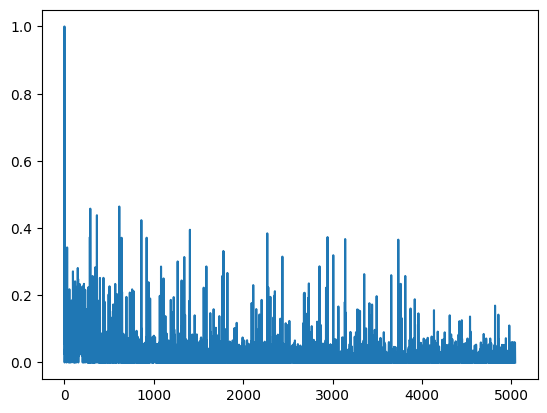

In [152]:
# Veamos la distribución de la similitud entre la escogida y el resto de películas
plt.plot(similitud)

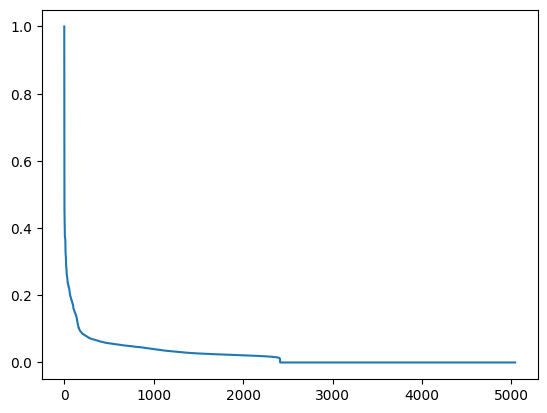

In [153]:
# Ahora ordenamos los resultados en orden descendente de similitud y sacamos el gráfico
plt.plot(similitud[(-similitud).argsort()])

['I Spy', 'True Lies', 'Die Hard with a Vengeance', 'Executive Decision', 'Spy Kids', 'The Man Who Knew Too Little', 'Casino Royale', 'Casino Royale', 'From Paris with Love', 'Body of Lies']


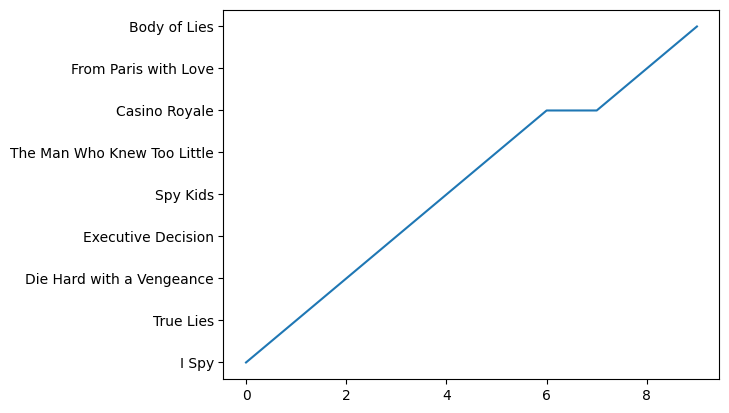

In [154]:
# Obtenemos los 10 resultados más similares a la película
recomendacion = (-similitud).argsort()[1:11]
# Sacamos el título de las películas, dado que "similitud" nos devuelve el número
def respuesta(): 
       return [peliculas.index[i] for i in recomendacion.data]
        
print(respuesta())
plt.plot(respuesta())